In [57]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
import multiprocessing as mp
from multiprocessing import Pool
import time
print("Number of processors: ", mp.cpu_count())

Number of processors:  20


In [12]:
trs_afterTrans = np.load("BWRn.npy")

In [14]:
kk_bifurcation = np.linspace(0.9, 4.0, 3101)

In [10]:
kk0 = np.load('/home/xxc90/chaos/kk0.npy')
LES = np.load('/home/xxc90/chaos/BWRLES001.npy')

time used:  131.02213168144226


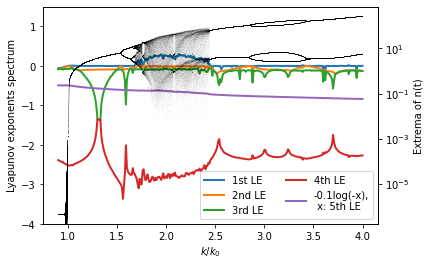

In [82]:
time_start = time.time()

fig, ax1 = plt.subplots()


ax2 = ax1.twinx() 
ax2.set_ylabel("Extrema of n(t)")
ax2.set_yscale('log')
for i in range(0, len(kk_bifurcation)):
    a = trs_afterTrans[i,:]
    local_extrema = a[np.concatenate((signal.argrelextrema(a, np.greater)[0], signal.argrelextrema(a, np.less)[0]))]
    local_extrema_len = len(local_extrema)
    #print(local_extrema)
    ax2.scatter(np.ones(local_extrema_len)*kk_bifurcation[i], local_extrema, marker = ".", edgecolors = "none", s=0.05, color = "black")

    
ax1.plot(kk0, LES[:,0:4], linewidth=2.0)
ax1.plot(kk0, -0.1*np.log(-LES[:, 4]), linewidth=2.0)
ax1.set_xlabel('$k/k_0$')
ax1.set_ylabel("Lyapunov exponents spectrum")
ax1.set_ylim([-4, 1.5])
ax1.legend(["1st LE", "2nd LE", "3rd LE", "4th LE", "-0.1log(-x),\n x: 5th LE"], loc = "lower right", ncol=2)
plt.savefig("LES_Bifurcation.png", dpi = 300)
time_end = time.time()
print("time used: ", time_end - time_start)
    